In [1]:
import sys
sys.path.append('/Users/rgao/Documents/Code/research/neurodsp/')
sys.path.append('/Users/rgao/Documents/Code/research/spectralCV/codes/')

import numpy as np
import scipy as sp
import scipy.io as io
import matplotlib.pyplot as plt
%matplotlib inline

from neurodsp import spectral
import neurodsp as ndsp

%load_ext autoreload
%autoreload 2

### pfc2 data

In [2]:
data = io.loadmat('/Users/rgao/Documents/Data/CRCNS/pfc2/EE.049/lfp_EE049.mat', squeeze_me=True)
lfp = data['data']
fs = data['fs']
t = data['t']
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'fs', 't'])

In [4]:
f_lfp, psd_lfp = spectral.psd(lfp, fs)

scv = []
for chan in range(48):
    f_lfp, scv_lfp = spectral.scv(lfp[chan,:], fs, outlierpct=1.)
    scv.append(scv_lfp)

scv = np.vstack(scv)

(0.5, 4)

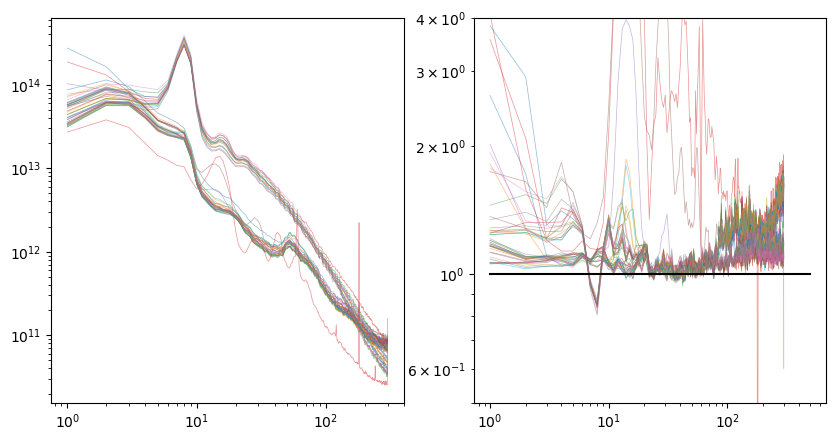

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.loglog(f_lfp[:300],psd_lfp[:48,:300].T, alpha=0.5, lw=0.5);

plt.subplot(1,2,2)
plt.loglog(f_lfp[:300], scv[:48, :300].T, alpha=0.5, lw=0.5)
plt.plot([1,500], [1,1], 'k')
plt.ylim([0.5, 4])

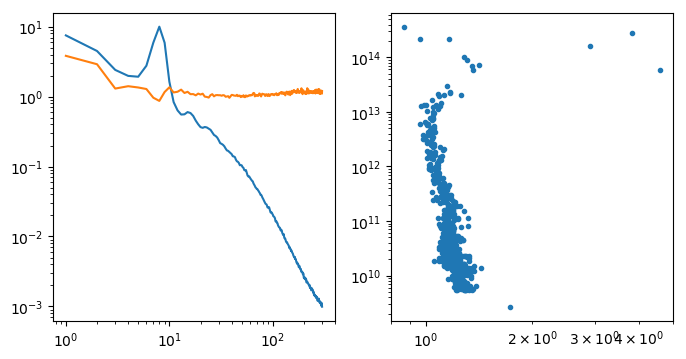

In [10]:
chan = 40
fig = plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.loglog(f_lfp[:300],psd_lfp[chan,:300].T/np.max(psd_lfp[chan,:300])*10);
plt.loglog(f_lfp[:300],scv[chan,:300].T);
plt.subplot(1,2,2)
plt.loglog(scv[chan,:],psd_lfp[chan, :], '.')

array([ 1.63603865,  1.28510402,  1.29943426,  1.2824411 ,  1.29902398,
        1.47316533,  1.29891986,  0.91873891,  0.80220202,  1.12480285,
        1.28335834,  1.1876475 ,  1.17499804,  1.27950186,  1.2234568 ,
        1.18613885,  1.11396269,  1.09980883,  1.08015469,  1.02030467,
        1.06880769,  1.1263205 ,  1.00010263,  1.02203358,  1.01973938,
        1.02357303,  1.04086611,  1.0588985 ,  1.05471092,  1.0981898 ,
        1.03994374,  1.1231447 ,  1.10746817,  1.08069254,  1.14963777,
        1.05042088,  1.03920618,  1.04626253,  1.04817074,  1.07841268,
        1.10696225,  1.08175917,  1.05770234,  1.11117262,  1.1142978 ,
        1.10064334,  1.07269868,  1.09524475,  1.1138623 ,  1.07313996,
        1.08467067,  1.03060502,  1.04925195,  1.06508254,  1.04047581,
        1.02851205,  1.03663731,  1.03915346,  1.09390023,  1.08400537,
        1.05557549,  1.11710348,  1.12700498,  1.09632149,  1.08062991,
        1.09121191,  1.08711923,  1.04682539,  1.12165962,  1.09

In [14]:
np.argsort(scv[:,30])

IndexError: too many indices for array

### testing hc2 spiking data with SCV

In [27]:
data = io.loadmat('/Users/rgao/Documents/Data/CRCNS/hc2/Raw/lfp_spiketimes_ec013.527.mat', squeeze_me=True)

In [28]:
data.keys()
lfp = data['data']
spk_fs = data['spk_binrate']
bsp = data['bsp']
fs = data['srate']
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'fnames', 'f', 'T', 'Par', 'srate', 'spksrate', 'data', 'T_shank', 'bsp', 'spk_binrate'])

In [29]:
f_spk, psd_spk = spectral.psd(bsp.T, spk_fs)
f_lfp, psd_lfp = spectral.psd(lfp, fs)
f_spk, scv_spk = spectral.scv(bsp[:,0], spk_fs, outlierpct=2.)
f_lfp, scv_lfp = spectral.scv(lfp[0,:], fs, outlierpct=2.)

/Users/rgao/Documents/Code/research/neurodsp/neurodsp/spectral.py:129: RuntimeWarning: divide by zero encountered in log10
  outlieridx = np.argsort(np.mean(np.log10(spg), axis=0))[:-discard]


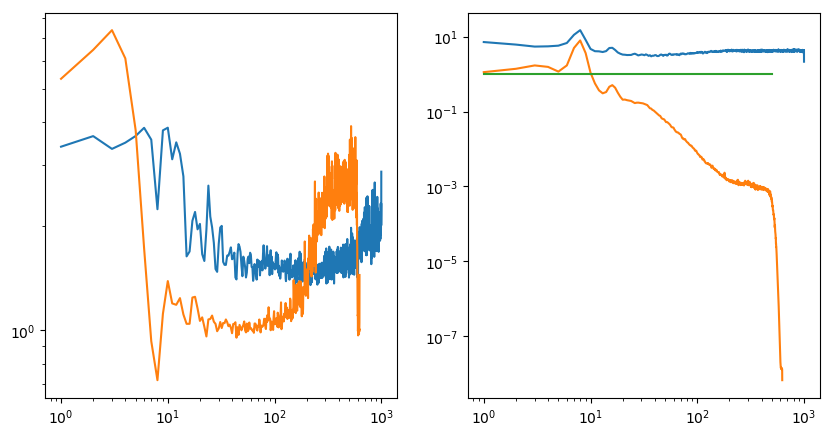

In [30]:
#plt.loglog(f_spk,psd_spk[:,:].T)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.loglog(f_spk,scv_spk)
plt.loglog(f_lfp,scv_lfp)
plt.subplot(1,2,2)
plt.loglog(f_spk,psd_spk[-1,:]*1e5)
plt.loglog(f_lfp,psd_lfp[-1,:]*1e-4)
plt.plot([1,500], [1,1])

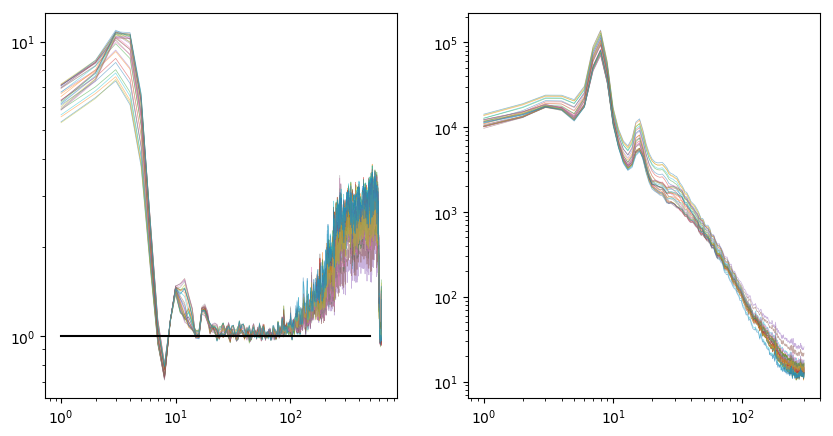

In [31]:
plt.figure(figsize=(10,5))
for chan in range(np.shape(lfp)[0]):
    f_lfp, scv_lfp = spectral.scv(lfp[chan,:], fs, outlierpct=1.)
    plt.subplot(1,2,1)
    plt.loglog(f_lfp, scv_lfp, alpha=0.5, lw=0.5)

plt.plot([1,500], [1,1], 'k')

plt.subplot(1,2,2)
f_lfp, psd_lfp = spectral.psd(lfp, fs)
plt.loglog(f_lfp[:300],psd_lfp[:,:300].T, alpha=0.5, lw=0.5);


In [32]:
S = sp.signal.spectrogram(lfp[0,:], fs, nperseg=int(fs),noverlap=0) # lol it auto-windows here ffs


data:  (1060, 149)
low-d data:  (1060, 2)
PCs: (2, 149)


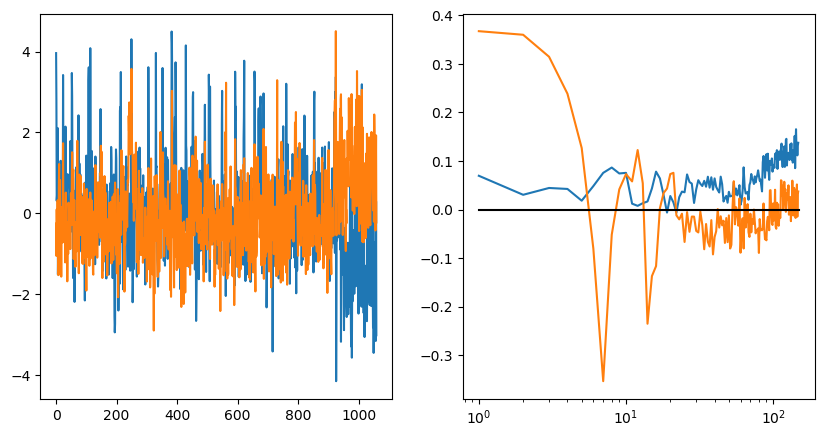

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=False)
X = np.log10(S[2])[1:150,:].T
pca.fit(X)
print('data: ', np.shape(X))
print('low-d data: ', np.shape(pca.transform(X)))
print('PCs:', np.shape(pca.components_))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
X_trans = pca.transform(X)
plt.plot(X_trans)
#plt.plot(pca.transform(X)[:,0],pca.transform(X)[:,1], '.')
#plt.plot(pca.components_.T)
plt.subplot(1,2,2)
plt.semilogx(pca.components_.T);
plt.plot([1,150], [0,0], 'k-')

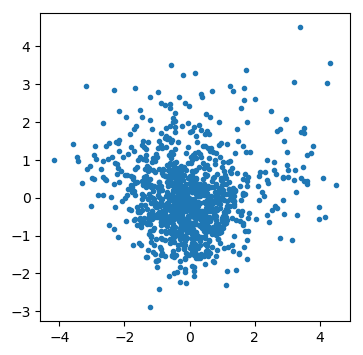

In [75]:
plt.plot(X_trans[:,0],X_trans[:,1],'.')

### testing Carmena monkey data

In [101]:
# import Carmena monkey data
data = io.loadmat('/Users/rgao/Documents/Data/Carmena/020608B/LFP65_128.mat', squeeze_me=True)
LFP = data['LFP']
fs = data['fs']
events = io.loadmat('/Users/rgao/Documents/Data/Carmena/paco020608b_events.mat', squeeze_me=True)

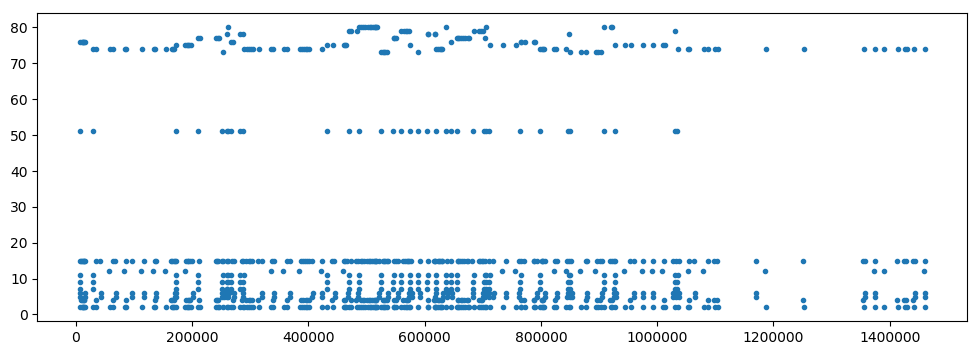

In [102]:
plt.figure(figsize=(12,4))
plt.plot(events['Strobed'][:,0]*1000,events['Strobed'][:,1], '.')

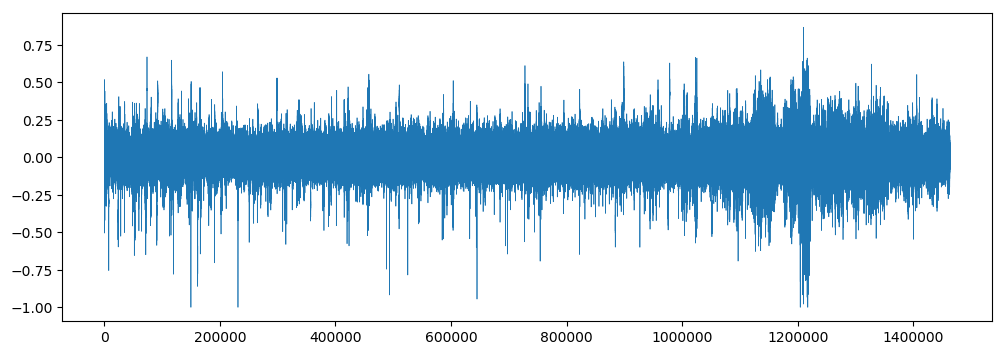

In [103]:
plt.figure(figsize=(12,4))
plt.plot(LFP[:,50], lw=.5)

500

In [124]:
winlen = 1000
numchan=64
psd = np.zeros((int(winlen/2+1), numchan))
scv = np.zeros((int(winlen/2+1), numchan))
for chan in range(numchan):
    lfp_filt = ndsp.filter(LFP[:,chan], fs, 'bandstop', f_lo=59, f_hi=61, iir=True, butterworth_order=3, remove_edge_artifacts=False)
    fpsd, psd[:,chan] = spectral.psd(lfp_filt, fs, nperseg=int(winlen))
    fscv, scv[:,chan] = spectral.scv(lfp_filt, fs, nperseg=int(winlen), outlierpct=2.)
    
#     fpsd, psd[:,chan] = spectral.psd(LFP[:,chan], fs, nperseg=int(winlen))
#     fscv, scv[:,chan] = spectral.scv(LFP[:,chan], fs, nperseg=int(winlen), outlierpct=2.)

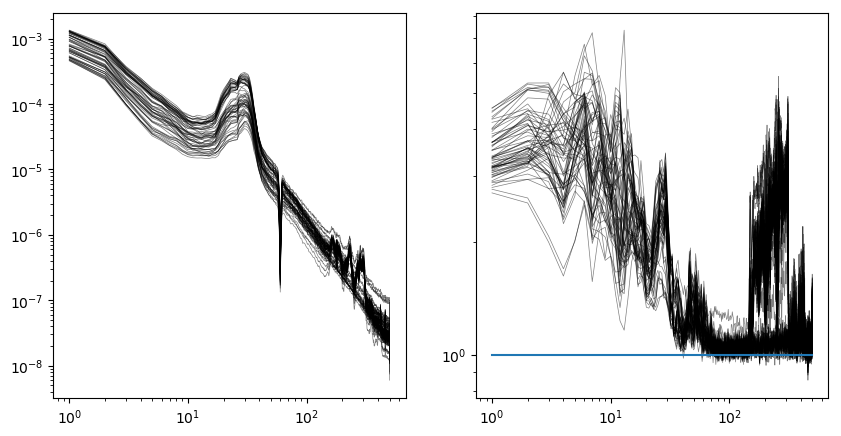

In [125]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.loglog(fpsd,psd, 'k', lw=0.5, alpha=0.5)
plt.subplot(1,2,2)
plt.loglog(fscv,scv, 'k', lw=0.5, alpha=0.5)
plt.plot([1,500], [1,1])

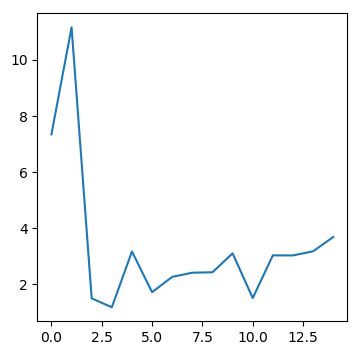

In [91]:
plt.plot(scv[13,49:]);

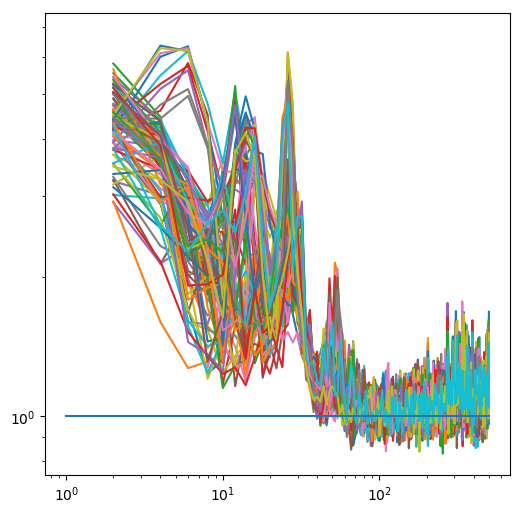

In [80]:
f, T, scv_rs = spectral.scv_rs(LFP[:,10], fs, nperseg=500, noverlap=0)
plt.figure(figsize=(6,6))
plt.loglog(np.arange(0,501,2), scv_rs);
plt.plot([1,500], [1,1])

In [22]:
# trying to recreate Lauren's error
fs=1000.
datapath = '/Users/rgao/Documents/Data/NeuroTycho/Propofol/20120802PF_Anesthesia+and+Sleep_Chibi_Toru+Yanagawa_mat_ECoG128/Session%d/'
tf3 = ep.getTimeFile(datapath, 3)
s3start = int(ep.getStart(tf3,0)*fs)
s3end = int(ep.getEnd(tf3,1)*fs)
data = ep.getECoGdata(datapath, 3, 1)
s3end
spectral.scv(data[s3start:s3end], fs, outlierpct=1.)[1]

# the problem is that s3start is a negative number in the timing file, thus slicing doesnt make sense. 
# need to enforce positivity at the starting index

/Users/rgao/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1633: UserWarning: nperseg = 1000 is greater than input length  = 0, using nperseg = 0
  .format(nperseg, input_length))


IndexError: tuple index out of range

### developing utils code
- NOPE looper
- DONE filter-Hilbert SCV & power distribution
- DONE fitting exponential distribution
- log-spaced FFT/filtering
- IAAFT

In [2]:
import scv_utils

In [3]:
data = io.loadmat('/Users/rgao/Documents/Data/CRCNS/pfc2/EE.049/lfp_EE049.mat', squeeze_me=True)
lfp = data['data']
fs = data['fs']
t = data['t']
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'fs', 't'])

(600, 610)

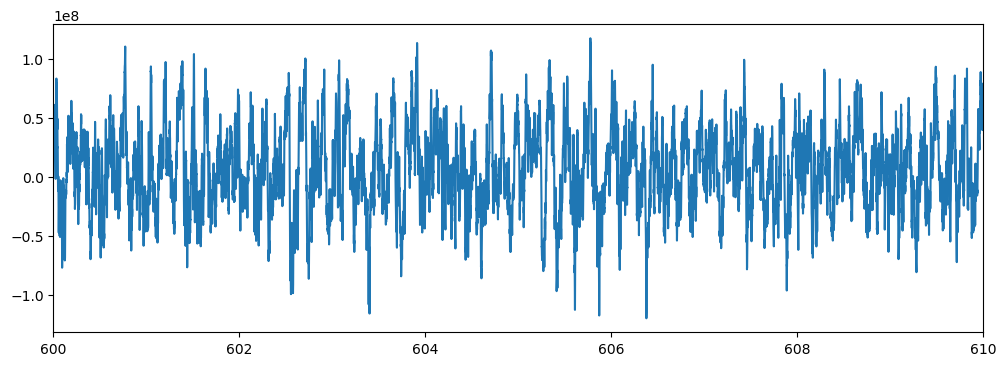

In [26]:
chan = 35
tlim = (600,610)
tind = np.logical_and(t>tlim[0], t<tlim[1])
plt.figure(figsize=(12,4))
plt.plot(t[tind], lfp[chan,tind])
plt.xlim(tlim)

(0.5, 4)

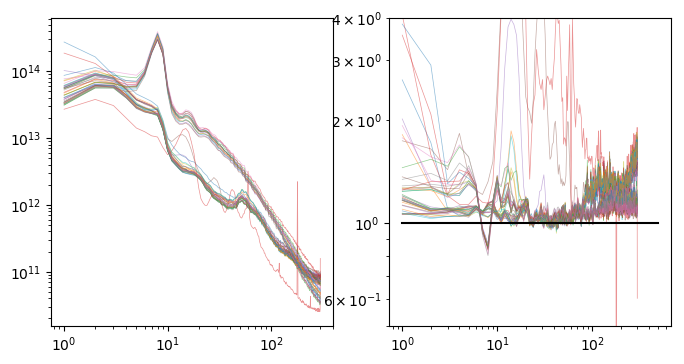

In [4]:
f_lfp, psd_lfp = spectral.psd(lfp, fs)

scv = []
for chan in range(48):
    f_lfp, scv_lfp = spectral.scv(lfp[chan,:], fs, outlierpct=1.)
    scv.append(scv_lfp)

scv = np.vstack(scv)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.loglog(f_lfp[:300],psd_lfp[:48,:300].T, alpha=0.5, lw=0.5);

plt.subplot(1,2,2)
plt.loglog(f_lfp[:300], scv[:48, :300].T, alpha=0.5, lw=0.5)
plt.plot([1,500], [1,1], 'k')
plt.ylim([0.5, 4])

In [35]:
7/40

0.175

In [39]:
#chan = 
# frange = (40, 50)
# pw, cf, scv, bw = scv_utils.inst_pwcf(lfp[chan,:], fs=fs, frange=frange, n_cycles=5, winLen=int(fs*0.175), stepLen=int(fs*0.175))
frange = (5, 10)
pw, cf, scv, bw = scv_utils.inst_pwcf(lfp[chan,:], fs=fs, frange=frange, n_cycles=5, winLen=int(fs), stepLen=int(fs))

(1000, 1500)

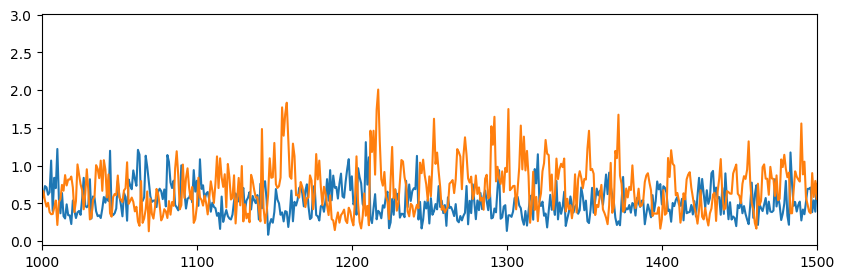

In [40]:
plt.figure(figsize=(10,3))
plt.plot(scv)
plt.plot(pw/2e15)
plt.xlim([1000,1500])

array([[ 1.        , -0.36371498],
       [-0.36371498,  1.        ]])

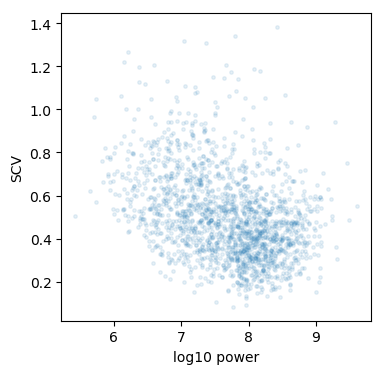

In [44]:
#x = np.log10(pw)
x = cf
y = scv
plt.plot(x,y,'.', ms=5, alpha=0.1)
plt.xlabel('log10 power')
plt.ylabel('SCV')
sp.corrcoef(x, y)

In [108]:
pw, cf, scv, bw = scv_utils.inst_pwcf(lfp[chan,:], fs=fs, frange=frange, n_cycles=7)

1.072747258978145

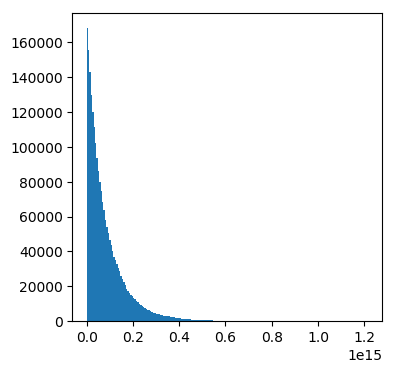

In [109]:
plt.figure(figsize=(4,4))
plt.hist(pw, bins=200)
np.std(pw)/np.mean(pw)

In [116]:
params = sp.stats.gamma.fit(pw, floc=0.)
print(params)
params = sp.stats.expon.fit(pw, floc=0.)
print(params)
params = sp.stats.chi2.fit(pw, floc=0.)
print(params)
params = sp.stats.chi2.fit(pw, floc=0., fdf=2)
print(params)

(0.9450087029518678, 0.0, 88542526809885.891)
(0.0, 83673459251699.344)
(2.5149618560762264, 0.0, 28293393045700.348)
(2, 0.0, 41836732861645.828)


### rolling window OLS

In [5]:
from pyfinance import ols
# alpha is constant, beta is slope

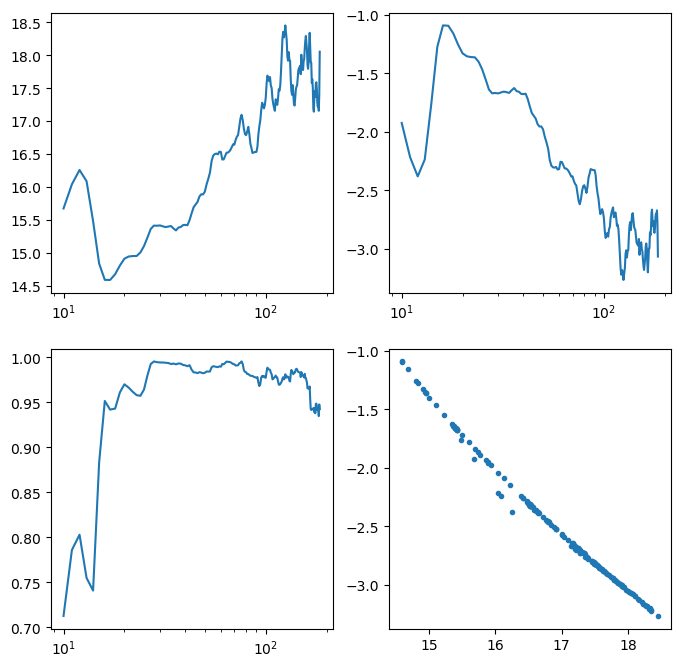

In [97]:
x = f_lfp[5:200]
y = psd_lfp[chan,5:200]
#y = scv[chan,5:200]

winlen=10
model = ols.RollingOLS(y=np.log10(y), x=np.log10(x), window=20, has_const=False, use_const=True)
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.semilogx((x[int(winlen/2):int(len(model.alpha)+winlen/2)]),model.alpha)
plt.subplot(2,2,2)
plt.semilogx((x[int(winlen/2):int(len(model.alpha)+winlen/2)]),model.beta)
plt.subplot(2,2,3)
plt.semilogx((x[int(winlen/2):int(len(model.alpha)+winlen/2)]),model.rsq)
plt.subplot(2,2,4)
plt.plot(model.alpha, model.beta, '.')

In [123]:
import noise_sim

In [213]:
t = np.arange(0,30,0.001)
ou = noise_sim.OU_process(t, theta=20., mu=0., sigma=5.)
f_axis,pou = ndsp.spectral.psd(ou, Fs=1000, nperseg=1000)

In [216]:
params = {
    'mu': 10.,
    'sigma': 1.,
    'theta': 1.,
    'tau': 0.005    
}
t = np.arange(0,30,0.001)
x=noise_sim.noise_sim(t, 10, 'colored')

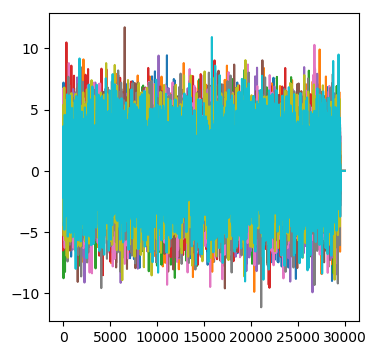

In [219]:
plt.plot(x);

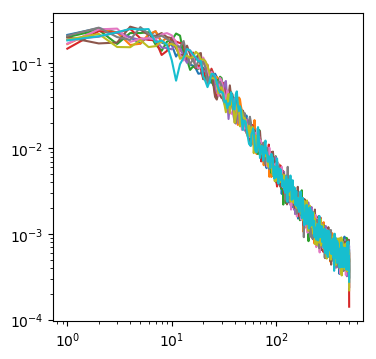

In [220]:
plt.loglog(ndsp.spectral.psd(x.T,Fs=1000)[1].T);